<a href="https://colab.research.google.com/github/Davit00tar/Amazon-books-Analytics/blob/main/Project_Amazon_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

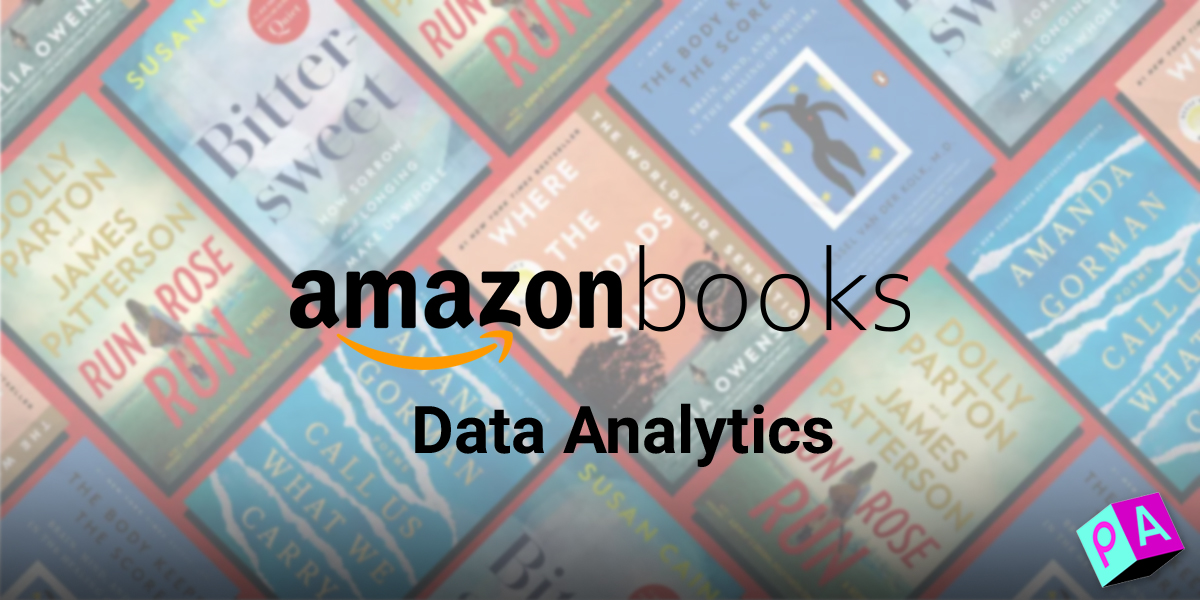

*****
Project members:

`Davit Tarverdyan`

`Arthur Sargsyan`

`Nikolay Khachatryan`



#  **1. Project description**

 1.1 Amazon Books Data Analytics
---
Project Overview: This project aims to analyze the collected data of over 1500 books from amazon.com. The data includes various factors such as book ratings, vote's count, and prices of different versions of the books such as Kindle, Audiobook, Hardcover, and Paperback. Additionally, the Bayesian weight of each book will also be calculated and analyzed to draw insights and conclusions.

**Goals and Objectives**:


*   To analyze the distribution of book ratings and votes count to understand the popularity of books.
*   To compare the prices of different versions of books and identify the most cost-effective option.
*   To determine the relationship between book ratings and prices.
*   To calculate and analyze the Bayesian weight of each book to determine their credibility.
---
**Methods and Techniques**:

* Descriptive statistics will be used to summarize the data.
* Data visualization techniques will be employed to present the results in a clear and meaningful manner.
* Correlation analysis will be performed to determine the relationship between different variables.
* Bayesian weight calculation will be performed using established formulas and techniques.
---
**Expected Outcomes**:

Detailed insights into the book data collected from amazon.com.
A comparison of different versions of books in terms of pricing and popularity.
Identification of the most cost-effective option for purchasing books.
A conclusion on the credibility of the books based on their Bayesian weight.
The project will deliver valuable insights into the data collected from amazon.com and provide a comprehensive analysis of books based on various factors. The outcomes will help readers make informed decisions while purchasing books on amazon.com.

## 1.2 Data source

Official website of **Amazon** **--->** https://www.amazon.com/

## 1.3 Our goals

We will try to get information about following categories.
1. **Amazon bestseller books**:  See which books actually sell well. And understand what are the main reasons for each book to be a bestseller.
****
2. **Rating**: 
****
3. **Rating and Vote Count**: Undesrtand what are the books that readers prefer. This will help to know readers well, to understand their psichology.
****
4. **Book Feautures**:  Information about prices and formates of every book.
**** 
5. **Books Bayesina Weight**: *This one is important for comparing book ratings for books with different vote count.* Having good rating is very importnant for reader.
****
6. **Author Rating and Bayesina Weight**: Understand the differences of the authers, and based on the ratings of the books they have written calcualte Author's rating.
****
7. **Bestseller Author's sales**
****
7. **Rank Sales** Information about book's rating and it's sales
****
8.**Prices and Formats**:  Know how market works and what pricees are preffered. What is the most optimal price for each book format, depending on the number of vote counts and ratings.
****
9. **Relationships and Correlations**: Find connections between previously listed  features for making various decisions. 
****
10. **Future possibilities**: Use machine learning models and algorithms to predict which books will become bestsellers. 


#  2 Data Capturing


## 2.1 Process

**Process Description**

This code uses the Selenium WebDriver with Python to scrape book information from multiple pages on Amazon.com. The URLs of the pages to scrape are stored in a list called "URLs".

The script uses a for loop to iterate through each URL in the list and scrape information for each book element on the page.

* The **book elements** are located using the **CSS** selector `.s-result-ite`. 

* The **Titles** of each book are located using the **CSS** selector `.a-size-medium` 

* The **Authors** are located using **CLASS NAME**
 `a-size-base`

* For each book the **Rating** is located using the **CSS** selector `.a-icon-alt`

---
**Note** that not all the books have all the properites which is described above, therefor at this step the book properites that are missing have been initialised as **'N/A'**

---
 The following information is extracted for each book element: title, author, rating, number sold, price, and format for each price.
For each book, the information is stored as a dictionary and appended to the "books" list. After all the books have been processed, the information is stored in a Pandas DataFrame and written to a CSV file.

In [ ]:
# Import all the nesesery libraries
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from tests import URLs
from collections import defaultdict
import pandas as pd

books = []
# Itereate throw URLs and search for data
for url in URLs:
    # Make webdriver
    driver = webdriver.Safari()
    driver.get(url)

    # Sleep to load the page
    sleep(5)
    # Finding Book elements
    book_elements = driver.find_elements(By.CSS_SELECTOR,".s-result-item")
    # Iterate throw book elements
    for book_element in book_elements:
        # Find the book title
        try:
            title_element = book_element.find_element(By.CSS_SELECTOR, ".a-size-medium")
            title = title_element.text
        except:
            title = ''

        # Find the book author using CLASS NAME
        try:
            author_and_date_element = book_element.find_element(By.CLASS_NAME, "a-size-base")
            author_and_date_lst = author_and_date_element.text.split('|')
            for el in author_and_date_lst:
                if "by" in el:
                    author = el
        except:
            author = ''

        # Find the book rating using CSS SELECTOR
        try:
            rating_element = book_element.find_element(By.CSS_SELECTOR,".a-icon-alt")
            rating = rating_element.text
        except:
            rating = ''

        # Find the book Vote count using XPATH
        try:
            rating_count_element = book_element.find_element(By.XPATH,
                                        './div/div/div/div/div/div[2]/div/div/div[2]/div/span[2]/a/span')
            sold = rating_count_element.text
        except:
            sold = ''
        # Find the book price and format using XPATH
        try:
            price_element_whole = book_element.find_elements(By.XPATH, ".//span[contains(@class,'a-price-whole')]")
            price_element_fraction = book_element.find_elements(By.XPATH, ".//span[contains(@class,'a-price-fraction')]")
            price_real = [el1.text + el2.text for el1, el2 in zip(price_element_whole, price_element_fraction)]
            book_format_elements = book_element.find_elements(By.XPATH, ".//a[contains(@class,'a-text-bold')]")
            book_format = [el.text for el in book_format_elements]
            prices ={bf: value for bf,value in zip(book_format, price_real)}
            prices = defaultdict(lambda :'N/A', prices)

        except:
            book_format = 'N/A'
            price_real = 'N/A'
            prices = {}
        books.append({'Title':title, 'Author':author, 'Rating':rating, 'Rating_Count':sold, 'Hardcover':prices['Hardcover'],
                      'Audiobook':prices['Audible Audiobook'], 'Kindle':prices['Kindle'], 'Paperback':prices['Paperback']})
    driver.quit()

# Write in csv
df = pd.DataFrame(books)
with open('books.csv', 'w') as file:
    df.to_csv(file, index=False)


## 2.2 Visual Example

Here is an Visual Example of how the Data Capturing is structured, and what kind of data has been collected.

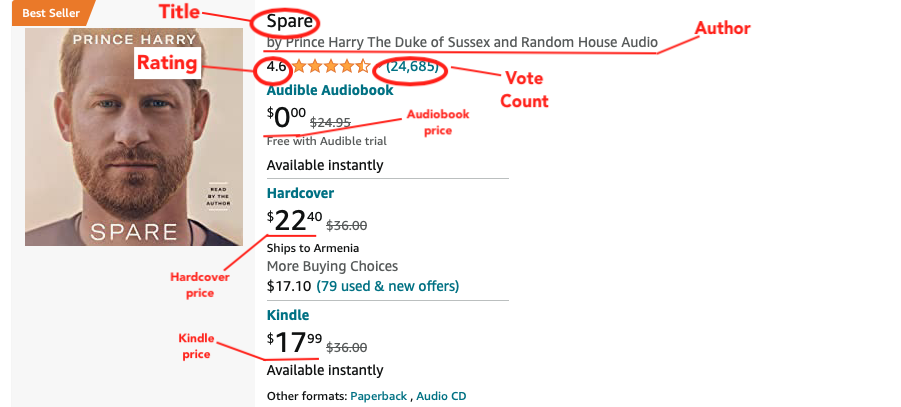

## 2.3 Dataset link

Here is the Absolute path for the raw dataset that has been collected directly form Amazon. The dataset provided here is not cleaned yet. It contains lots of unformated values, and also there are some values that have been captured from advertisements that were on the webpage which needs to be removed.

---

 **LINK:** https://drive.google.com/uc?export=download&id=1GAVxD0SUvMvSZ3zDPv2DLM8CUfQOaMSU

# 3 Data Cleaning, Processing , Normalization

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np


In [ ]:
# Make a Pandas DataFrame from the raw data
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=12TGqSQgHhcB92MhrrVVK7OgNDs11VoEx'
df = pd.read_csv(url)
df.head(20)

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spare,by Prince Harry The Duke of Sussex and Random ...,4.6 out of 5 stars,"24,565",22.40,0.0,17.99,NaN
2,Atomic Habits: An Easy & Proven Way to Build G...,by James Clear and Penguin Audio,4.8 out of 5 stars,"93,660",14.11,0.0,12.99,NaN
3,Lessons in Chemistry: A Novel,by Bonnie Garmus,4.6 out of 5 stars,"87,830",18.26,0.0,14.99,NaN
4,NaN,by Bonnie Garmus,4.4 out of 5 stars,NaN,19.28,NaN,NaN,53.85
5,NaN,by Bonnie Garmus,4.4 out of 5 stars,NaN,NaN,NaN,NaN,NaN
6,NaN,by James Patterson and Mike Lupica,4.5 out of 5 stars,NaN,20.30,NaN,NaN,NaN
7,NaN,by James Patterson and Mike Lupica,4.9 out of 5 stars,NaN,NaN,NaN,NaN,53.85
8,NaN,by James Patterson and Mike Lupica,4.6 out of 5 stars,NaN,NaN,NaN,NaN,NaN
9,NaN,by James Patterson and Mike Lupica,4.6 out of 5 stars,NaN,19.04,NaN,NaN,NaN


## 3.1 Removing Empty Values

We begin data cleaning by removing the empty data that has been collected due to ADS, that were on the webpage while collecteing the data. 

In [ ]:


df = df.dropna(subset=['Title'])
df = df.dropna(subset=['Rating_Count'])
df.iloc[9]

Title           Never Give an Inch: Fighting for the America I...
Author                                           by Mike Pompeo  
Rating                                         3.7 out of 5 stars
Rating_Count                                                   20
Hardcover                                                   20.99
Audiobook                                                     0.0
Kindle                                                      15.99
Paperback                                                     NaN
Name: 21, dtype: object

## 3.2 Changing data types








As Amazon is an onlie store, where lots of people all over the world add products, and fill the details by themselves, there are lots of inappropriate data that needs to be standartised. At this step we standartise the data by removing all the unnessecary symbols in the Columns


In [ ]:
# This function removies all the unnessecary symbols in the Rating_Count coulumn
def make_int(df , col):
  df[col] = df[col].str.replace("," , "")
  df[col] = df[col].str.replace("." , "")
  df[col] = df[col].str.replace("(" , "")
  df[col] = df[col].str.replace(")" , "")
  df[col] = df[col].astype(int)
make_int(df , "Rating_Count")
df

<ipython-input-4-1a38e357a9d9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace("." , "")
<ipython-input-4-1a38e357a9d9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace("(" , "")
<ipython-input-4-1a38e357a9d9>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace(")" , "")


,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback
1,Spare,by Prince Harry The Duke of Sussex and Random ...,4.6 out of 5 stars,24565,22.40,0.0,17.99,NaN
2,Atomic Habits: An Easy & Proven Way to Build G...,by James Clear and Penguin Audio,4.8 out of 5 stars,93660,14.11,0.0,12.99,NaN
3,Lessons in Chemistry: A Novel,by Bonnie Garmus,4.6 out of 5 stars,87830,18.26,0.0,14.99,NaN
15,It Starts with Us: A Novel (It Ends with Us),by Colleen Hoover,4.5 out of 5 stars,77487,NaN,0.0,13.99,10.49
16,It Ends with Us: A Novel (1),by Colleen Hoover,4.7 out of 5 stars,218347,NaN,0.0,10.99,9.99
...,...,...,...,...,...,...,...,...
1723,"The Energy Bus: 10 Rules to Fuel Your Life, Wo...",by Jon Gordon and Ken Blanchard,4.7 out of 5 stars,8637,18.79,0.0,15.00,NaN
1724,People of Walmart Adult Coloring Book: Rolling...,"by Andrew Kipple, Day Drankin' Press , et al.",4.7 out of 5 stars,10979,NaN,NaN,NaN,11.99
1725,"Run, Rose, Run: A Novel",by James Patterson and Dolly Parton,4.5 out of 5 stars,38427,15.00,0.0,15.99,NaN
1726,"Anne of Green Gables, Complete 8-Book Box Set",by L. M. Montgomery,4.8 out of 5 stars,8009,49.99,NaN,0.49,NaN


The way Amazon provides information abut the rating is not appropriate. At this step we remove all the undesired part of "Rating"

In [ ]:
# This function clears the strings in the "Rating" column: 4.6 out of 5 stars -> 4.6
def clear_str(df , col):
  df[col] = df[col].str.replace(" out of 5 stars" , "")
clear_str(df , "Rating")
df

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback
1,Spare,by Prince Harry The Duke of Sussex and Random ...,4.6,24565,22.40,0.0,17.99,NaN
2,Atomic Habits: An Easy & Proven Way to Build G...,by James Clear and Penguin Audio,4.8,93660,14.11,0.0,12.99,NaN
3,Lessons in Chemistry: A Novel,by Bonnie Garmus,4.6,87830,18.26,0.0,14.99,NaN
15,It Starts with Us: A Novel (It Ends with Us),by Colleen Hoover,4.5,77487,NaN,0.0,13.99,10.49
16,It Ends with Us: A Novel (1),by Colleen Hoover,4.7,218347,NaN,0.0,10.99,9.99
...,...,...,...,...,...,...,...,...
1723,"The Energy Bus: 10 Rules to Fuel Your Life, Wo...",by Jon Gordon and Ken Blanchard,4.7,8637,18.79,0.0,15.00,NaN
1724,People of Walmart Adult Coloring Book: Rolling...,"by Andrew Kipple, Day Drankin' Press , et al.",4.7,10979,NaN,NaN,NaN,11.99
1725,"Run, Rose, Run: A Novel",by James Patterson and Dolly Parton,4.5,38427,15.00,0.0,15.99,NaN
1726,"Anne of Green Gables, Complete 8-Book Box Set",by L. M. Montgomery,4.8,8009,49.99,NaN,0.49,NaN


Here there are 2 function that help us convert `pd.objects` to the desired **dtypes**: `float` and `string` 

In [ ]:
def make_float(df , *arr):
  for val in arr:
    df[val] = df[val].astype("float")

def make_str(df, *arr):
  for val in arr:
    df[val] = df[val].astype('string')
  
make_float(df , "Rating" , "Hardcover" , "Audiobook" , "Kindle" , "Paperback")
make_str(df, 'Title' ,'Author')

Check to see if all the columns are converted to the desired dtype

In [ ]:
print(df.dtypes)

Title            string
Author           string
Rating          float64
Rating_Count      int64
Hardcover       float64
Audiobook       float64
Kindle          float64
Paperback       float64
dtype: object


In the "Author" column we noticed that at the start of every Auther name there is a 'by' which we don't really care about so we remove it. And to prevebt the strings in the "Author" column from having spaces from left and right we use `str.lstrip` and `str.rstripe` methods to remove them

In [ ]:
df['Author'] = df['Author'].str[3:]
df['Author'] = df['Author'].str.lstrip()
df['Author'] = df['Author'].str.rstrip()

In [ ]:
df

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback
1,Spare,Prince Harry The Duke of Sussex and Random Hou...,4.6,24565,22.40,0.0,17.99,NaN
2,Atomic Habits: An Easy & Proven Way to Build G...,James Clear and Penguin Audio,4.8,93660,14.11,0.0,12.99,NaN
3,Lessons in Chemistry: A Novel,Bonnie Garmus,4.6,87830,18.26,0.0,14.99,NaN
15,It Starts with Us: A Novel (It Ends with Us),Colleen Hoover,4.5,77487,NaN,0.0,13.99,10.49
16,It Ends with Us: A Novel (1),Colleen Hoover,4.7,218347,NaN,0.0,10.99,9.99
...,...,...,...,...,...,...,...,...
1723,"The Energy Bus: 10 Rules to Fuel Your Life, Wo...",Jon Gordon and Ken Blanchard,4.7,8637,18.79,0.0,15.00,NaN
1724,People of Walmart Adult Coloring Book: Rolling...,"Andrew Kipple, Day Drankin' Press , et al.",4.7,10979,NaN,NaN,NaN,11.99
1725,"Run, Rose, Run: A Novel",James Patterson and Dolly Parton,4.5,38427,15.00,0.0,15.99,NaN
1726,"Anne of Green Gables, Complete 8-Book Box Set",L. M. Montgomery,4.8,8009,49.99,NaN,0.49,NaN


## 3.3 Removing unnessecary information from file

In [ ]:
def remove_substring(title):
    start = title.find('(')
    if start != -1:
        end = title.find(')', start) + 1
        return title[:start] + title[end:]
    return title

df['Title'] = df['Title'].apply(remove_substring)

There are some books taht appear more than once in our dataset, with the help of the following command we remove duplicates keeping the first one

In [ ]:
df = df.drop_duplicates()

## 3.4 Adding the Bayesian weight

At this stage we begin to add extra attributes for each book, starting from the **Bayesian weight**
*****

**ABOUT THE BAYESIAN WEIGHT AND WHY IT IS IMPORTANT**
*****
 In a scenario, a high vote count for a rating may indicate that it is more reliable, but it may also be the result of a highly biased sample. On the other hand, a low vote count for a rating may indicate that it is less reliable, but it may also be the result of a small, representative sample.

By incorporating prior information in the form of a probability distribution over the ratings, Bayesian weighting can help to stabilize the estimation process and account for the uncertainty in the ratings. The result is a more accurate representation of the underlying distribution of ratings, taking into account both the vote count and the prior information. This can be useful in applications such as recommendation systems, where accurate predictions are critical for making personalized recommendations to users.

---
**Formula:** `( (avg_rating * total_votes) + (prior_rating * prior_votes) ) / (total_votes + prior_votes)`

**Where:** 

`avg_rating` - the avarage rating we have for each book

`total_votes` - the vote count

`prior_votes` - the prior belief about the votes count

`prior_rating` - the prior belief about the rating

****
**CALCULATION**
****


Its time to decide what are the prior believes about the prior rating and prior vote count. Hense we assume that the `prior_votes` can be equal to **50.000** and the `prior_rating` can be **4.8**

In [ ]:
prior_rating = 4.8
prior_votes = 50000

For each book we will  calculate the bayesian weight and will append the result to the data frame. 

In [ ]:
df[df['Rating_Count']==df['Rating_Count'].max()]

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback
84,Where the Crawdads Sing,Delia Owens,4.8,385974,NaN,0.0,12.99,9.98


In [ ]:
bayes_series = ((df['Rating'] * df['Rating_Count']) + (prior_rating * prior_votes) ) / (df['Rating_Count'] + prior_votes)
bayes_series

1       4.734111
2       4.800000
3       4.672553
15      4.617659
16      4.718633
          ...   
1700    4.785270
1701    4.781995
1702    4.669631
1703    4.800000
1727    4.800000
Length: 1114, dtype: float64

We note that the Bayesina weight has too many digits so before appending it, we use the Pandas function `.round()` to round the elements

In [ ]:
df['Bayes_Weight'] = bayes_series.round(3)
df

<ipython-input-15-f6a98142ab5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bayes_Weight'] = bayes_series.round(3)


,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback,Bayes_Weight
1,Spare,Prince Harry The Duke of Sussex and Random Hou...,4.6,24565,22.40,0.0,17.99,NaN,4.734
2,Atomic Habits: An Easy & Proven Way to Build G...,James Clear and Penguin Audio,4.8,93660,14.11,0.0,12.99,NaN,4.800
3,Lessons in Chemistry: A Novel,Bonnie Garmus,4.6,87830,18.26,0.0,14.99,NaN,4.673
15,It Starts with Us: A Novel,Colleen Hoover,4.5,77487,NaN,0.0,13.99,10.49,4.618
16,It Ends with Us: A Novel,Colleen Hoover,4.7,218347,NaN,0.0,10.99,9.99,4.719
...,...,...,...,...,...,...,...,...,...
1700,"The Energy Bus: 10 Rules to Fuel Your Life, Wo...",Jon Gordon and Ken Blanchard,4.7,8637,18.79,0.0,15.00,NaN,4.785
1701,People of Walmart Adult Coloring Book: Rolling...,"Andrew Kipple, Day Drankin' Press , et al.",4.7,10979,NaN,NaN,NaN,11.99,4.782
1702,"Run, Rose, Run: A Novel",James Patterson and Dolly Parton,4.5,38427,15.00,0.0,15.99,NaN,4.670
1703,"Anne of Green Gables, Complete 8-Book Box Set",L. M. Montgomery,4.8,8009,49.99,NaN,0.49,NaN,4.800


In [ ]:
# import the nessecary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3.5 Making Additional DataFrames

Throwout the process we have noticed that in th efinal cleaned dataset there are sove price-values that are missing. This is due to the fact that some books don't have all the formats and in order to capture all the book-prices, without leaving some out we have concluded that it's a better practice to capture all the data and leave Blank the book-pricese that are missing.

  At this stage we are seperating the main dataset to 4 different datasets: in each dataset including only the books that have the format.

In [ ]:
# for books that are available in Paperback format
df_paperback = df.dropna(subset = ["Paperback"])
# for books that are available in Kindle format
df_kindle = df.dropna(subset = ["Kindle"])
# for books that are available in Hardcover format
df_hardcover = df.dropna(subset = ["Hardcover"])
# for books that are available in Audiobook format
df_audiobook = df.dropna(subset = ["Audiobook"])

# 4 DataSet Description

## 4.1 Clean DataSet Link

Here is the Cleaned dataset link: https://drive.google.com/uc?export=download&id=1xmFr1xWZzynokqKU9caFuwOsbCW8Eu2M

## 4.2 About the DataSet

Source: https://www.amazon.com/gp/browse.html?rw_useCurrentProtocol=1&node=8192263011&ref_=bhp_brws_100bks

---
DataSet Information: This DataSet is Scrupted from Amazon using Selenuim and is only for academic purposes. It contains information about Amazons bestseller books There are **1170 books**, and each book has the folloing attributes:


1.   **Name**- Name of the book  -  `string`
2.   **Author**- Name of the Author of the book - `string`
3.   **Rating**- The rating of the book - `float64`
4. **Rating_Count**- Number of votes for the Rating of the book - `int64`
5. **Hardcover**- Hardcover price of the book (if the book exists in this format) - `float64` or `NaN`
6. **Audiobook**- Audiobook price of the book (if the book exists in this format) - `float64` or `NaN`
7. **Kindle**- Kindle price of the book (if the book exists in this format) - `float64` or `NaN`
8. **Paperback**- Paperback price of the book (if the book exists in this format) - `float64` or `NaN`
9. **Bayes_Weight**- Calculated Bayesian weight for each book - `float64`






In [ ]:
print(df.dtypes)

Title            object
Author           string
Rating          float64
Rating_Count      int64
Hardcover       float64
Audiobook       float64
Kindle          float64
Paperback       float64
Bayes_Weight    float64
dtype: object


---
The dataset has been collected on 20/01/2023.

---

# 5 Analizing data and visualisation

Here we start the data Visualisation and Analizing process. Below there are 7 of the goals we have covered earlyer.
1. Find the Bestseller Books 
2. Best books based on rating
3. Understand the relationship between Rating and wote count
4. See How different book formats relate to eachother
5. Bayesian weight and Book Rating
6. Calculating the Authors' rating
7. Calculating the Authors' sales
---



## 5.0 Visualisation Colors

Here we demonstrate the color combinations and design patters we have used throwout the project.

---

* For Visualisatin the main **style** that we have used is `seaborn-pastel`
* For the colormode in colorbars we have used the style `YlGnBu`
* For the colors we have used these colors using their hex-values: `'#253659', '#03A696', '#04BF9D', '#F27457','#BF665E'`. Below you can see a visual representation of colors we have chosen

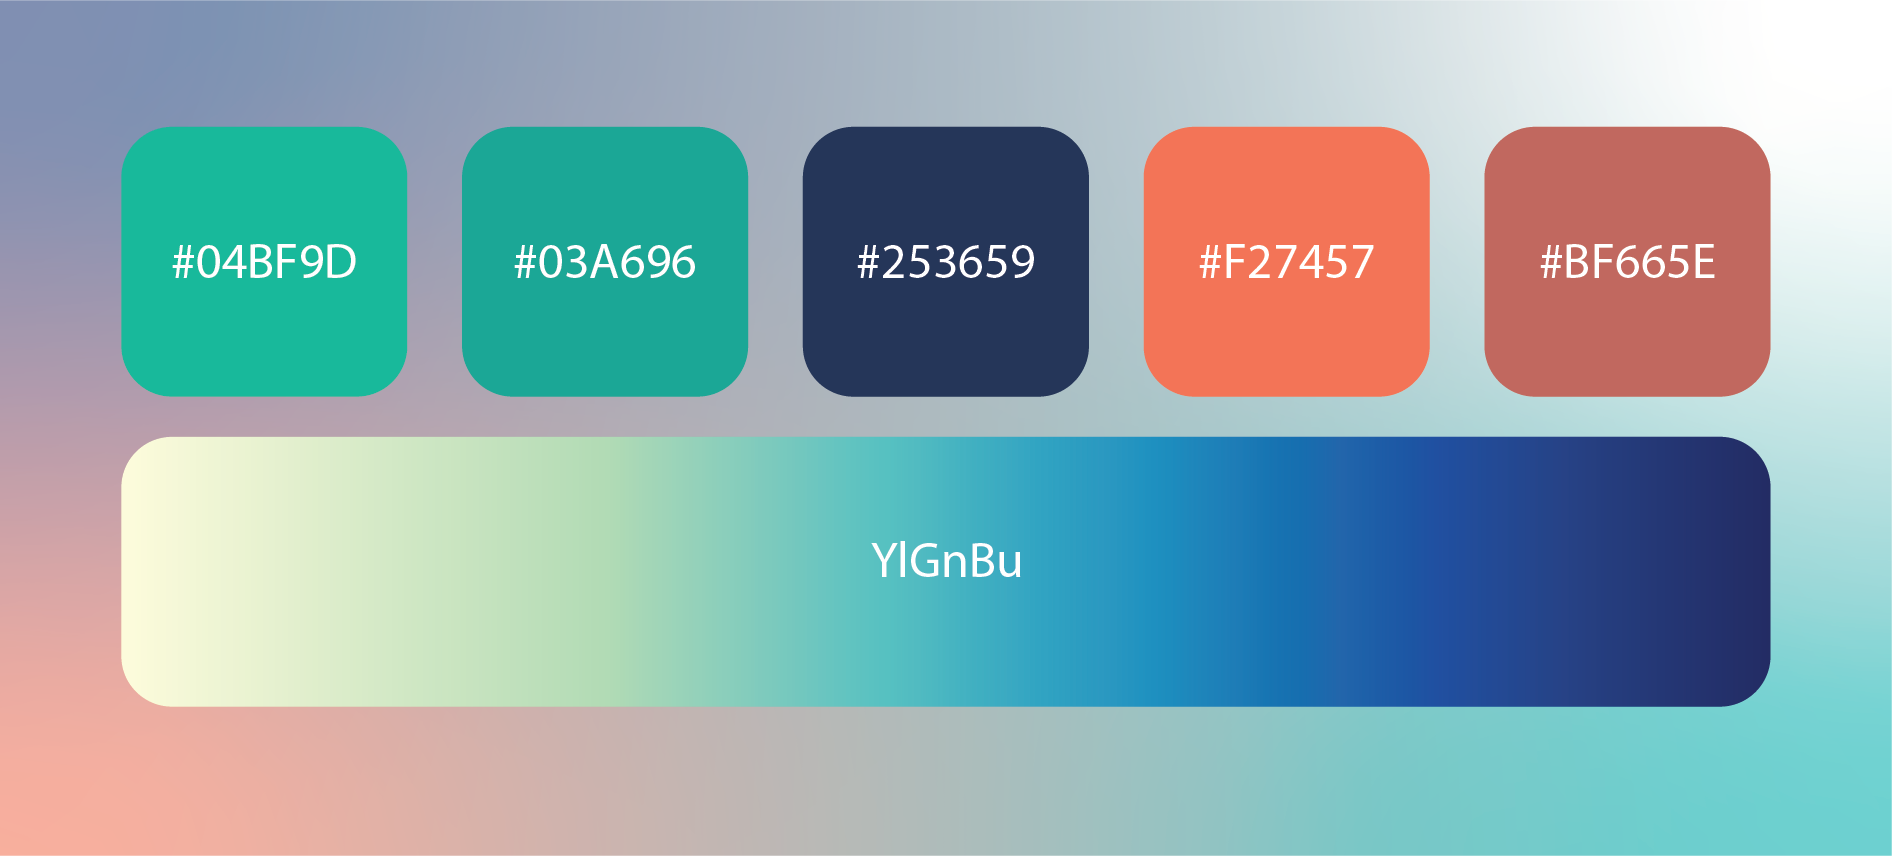

As the colors for the visualisation has already been selected here we import `matplotlib` and make a variable named `colors` that contains the colors' hex-values in a list

In [ ]:
# Import Matplotlib
import matplotlib.pyplot as plt
# Make Colors
colors = ['#253659', '#03A696', '#04BF9D', '#F27457','#BF665E' ]

## 5.1 Bestseller books

Bestseller books are a fascinating topic to explore in the world of literature, and understanding what makes them so popular is of utmost importance. So the first task is to find the bestseller books. For understanding which books are bestsellers,  as a *bestseller factor* we have chosen the **Vote count**. *The more a book is rated the more popular it is*.

 In the age of digitalization, the books market is becoming more competitive, and it is crucial to have a deep understanding of the factors that contribute to a book's success. The rating vote count is one of the key indicators of a book's popularity, and by analyzing the bestseller books based on this criterion, we can gain valuable insights into what readers are looking for in a good book.



In [ ]:
# Make a new dataframe that is sorted based on Vote Count
df_sorted_reting_count = df.sort_values(by="Rating_Count", ascending=True)
bestseller = df_sorted_reting_count[-10:]
bestseller.index = range(1, len(bestseller) + 1)



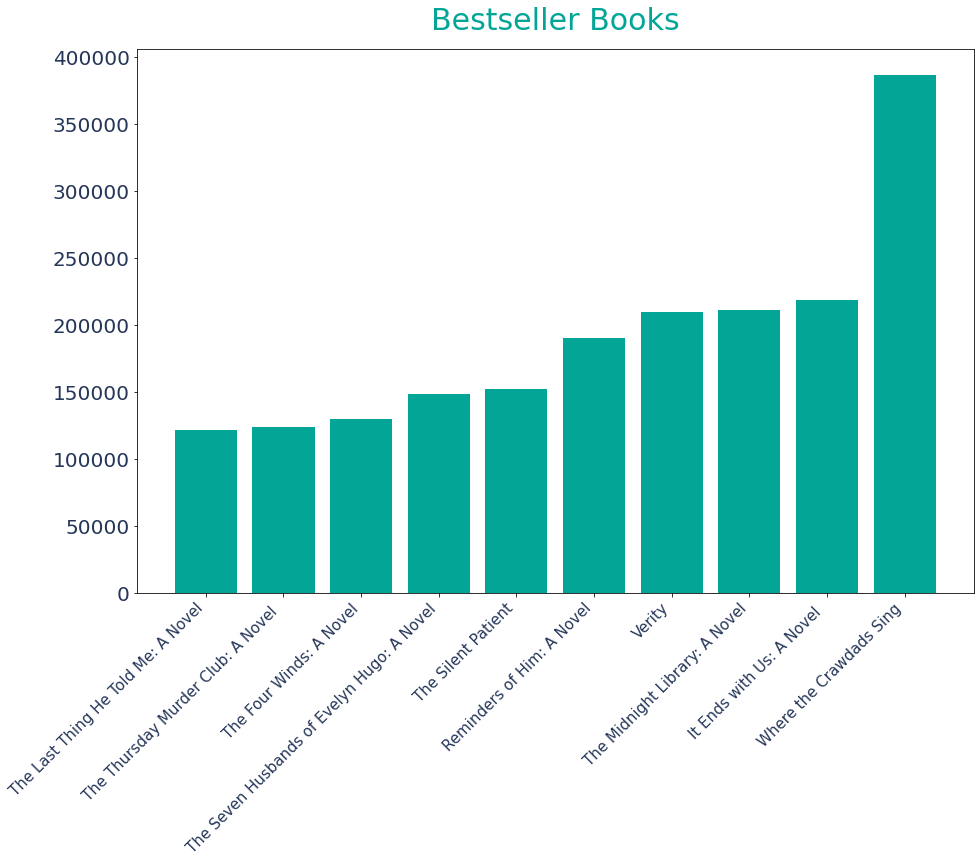

In [ ]:
plt.subplots(figsize=(15,10))
plt.style.use("seaborn-pastel")
plt.bar(bestseller['Title'] , bestseller['Rating_Count'], color=colors[1])
plt.xticks(rotation = 45 , fontsize = 15, ha='right' , color = colors[0])
plt.yticks(fontsize = 20 , color = colors[0])
plt.title("Bestseller Books",  fontsize = 30, fontname='Arial', pad = 20, fontweight='normal', color = colors[1]);

plt.show()

As we can see from the Barplots the Most Rated book on our list is the book by Delia Owens `Where the Crawdads Sing`. In comparison to other books the book has more than 15000 Vote count 





In [ ]:
# Here we can see the book's attributes
df[df['Title'] == 'Where the Crawdads Sing']

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback,Bayes_Weight
84,Where the Crawdads Sing,Delia Owens,4.8,385974,NaN,0.0,12.99,9.98,4.8


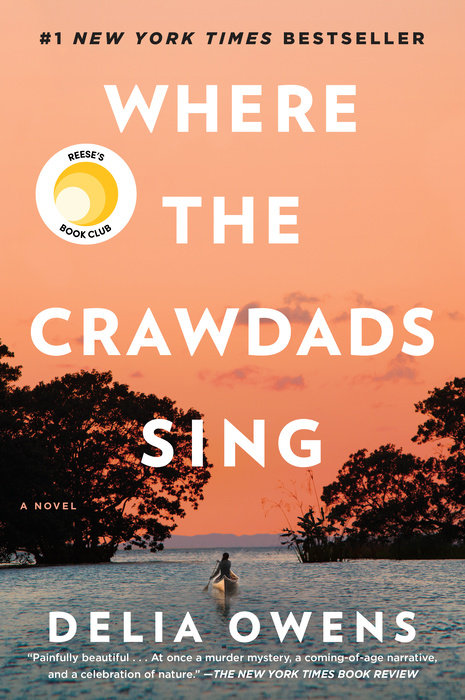

## 5.2 Rating

Here is the list of the TOP 10 books based on their Bayesi Weight. Here it is obvious that all the books listed here have 4.9 rating, but based on thair Vote count their Bayes Weight differs.

In [ ]:
df_sorted = df.sort_values(by="Bayes_Weight", ascending=False)
interesting_books = df_sorted.head(10)
interesting_books.index = range(1, len(interesting_books) + 1)
interesting_books

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback,Bayes_Weight
1,Harry Potter Paperback Box Set,J. K. Rowling and Mary GrandPré,4.9,96503,204.24,NaN,62.99,38.86,4.866
2,I Love You to the Moon and Back,Amelia Hepworth and Tim Warnes,4.9,62994,18.47,0.0,NaN,NaN,4.856
3,The Very Hungry Caterpillar,Eric Carle,4.9,56861,NaN,0.0,8.99,NaN,4.853
4,Love You Forever,Robert Munsch and Sheila McGraw,4.9,55467,11.69,NaN,4.73,4.98,4.853
5,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr. and Eric Carle,4.9,49043,NaN,0.0,8.99,NaN,4.850
6,D&D Player’s Handbook,Dungeons & Dragons,4.9,47790,26.10,NaN,NaN,NaN,4.849
7,"Oh, the Places You'll Go!",Dr. Seuss,4.9,44153,9.92,0.0,9.99,NaN,4.847
8,Percy Jackson and the Olympians 5 Book Paperba...,Rick Riordan and John Rocco,4.9,36125,62.99,NaN,NaN,18.29,4.842
9,Chicka Chicka Boom Boom,"Bill Martin Jr., John Archambault , et al.",4.9,34763,10.49,NaN,7.99,NaN,4.841
10,Where the Wild Things Are: A Caldecott Award W...,Maurice Sendak,4.9,32940,12.95,0.0,NaN,18.28,4.840


The books that have more Vote count have higher Bayes Weight.

## 5.3 Rating and Vote Count

Moving on we have a graph called **"Relation between Bayes Weight and Vote Count"**. The graph shows the change of Bayes Weight in relation to the change of Vote Count. 

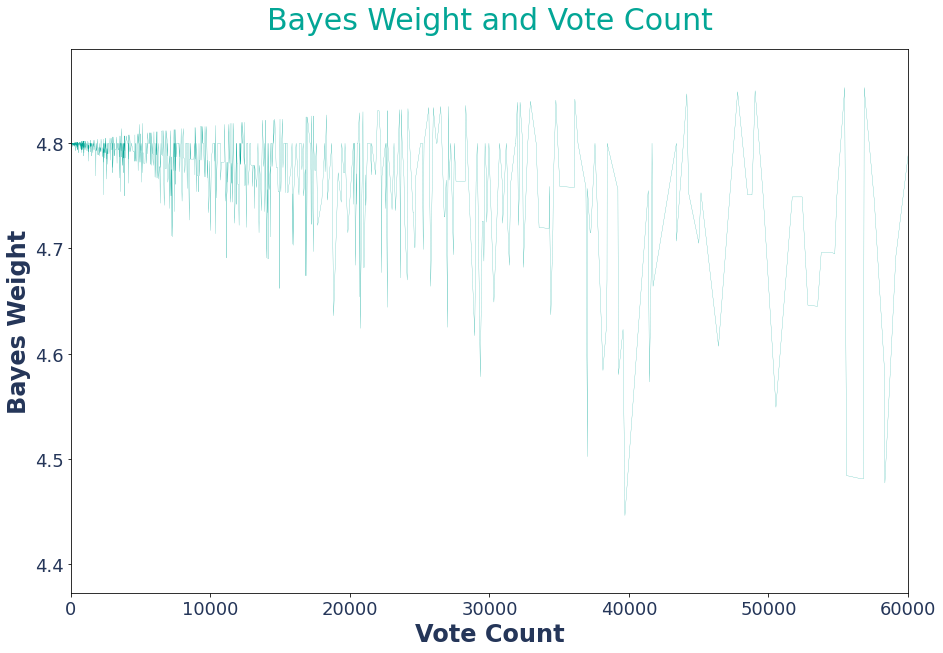

In [ ]:
plt.style.use("seaborn-pastel")
plt.subplots(figsize=(15,10))
dff = df.sort_values(by='Rating_Count')
plt.plot(dff["Rating_Count"] , dff["Bayes_Weight"]  , color = colors[1], linewidth=0.2);
plt.title("Bayes Weight and Vote Count" ,  fontsize = 30 ,fontname='Arial' ,pad = 20 , fontweight='normal' , color = colors[1]);
plt.xlim(0, 60000)
plt.xticks(color = colors[0] , fontsize = 18)
plt.yticks(color = colors[0] , fontsize = 18);
plt.xlabel("Vote Count" , fontsize = 24 , fontweight='bold' , color = colors[0]);
plt.ylabel("Bayes Weight" , fontsize = 24 , fontweight='bold' , color = colors[0]);



As we have mentioned before for the **Prior Rateing we have chosen 4.8**, this is the reason why at 0 Rating count we have a Bayes Weight: 4.8. 

---
**Conclution:**

*At this step the terms **Bayes Weight** and **Rating** are used interchangably*.

There are many factors that effect the Bayes Weight. One of the main factors is the Vote count. As the Vote count increses the difference of Prior Rating and Bayes Weight increases. One important thinto note here is the fact that with the increse of Vote count the Rating becomes more reliable. So the rating of the books that have more than 50000 Vote counts are more reliable than the ratings of the books that have less than 10000 Vote count. Another important thing to note here is the fact that with the incresre of the Vote Count the Bayes Weight differs from Prior Rate.

## 5.4 **Book Feautures**

Here we analised the book formats quantity and the relation between Prices of each book and the rating. Analising the data we will understand how different book formats can effect the books price and rating

---
Here we can see a Piechart that shows book formats' quantity. As we can see from the graph we have **32.4%** Kindle books which is the highest value and 
**19.2%** Hardcover books as the least quantity.

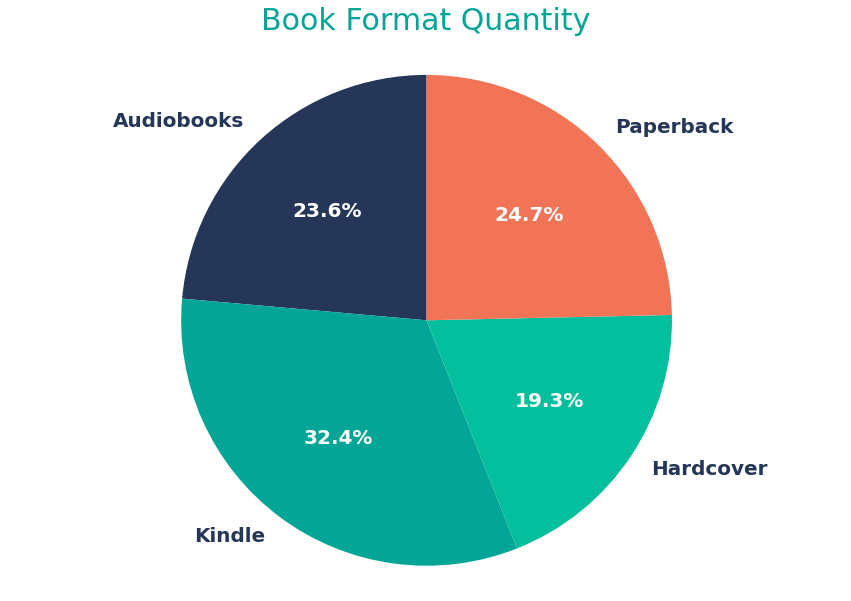

In [ ]:
plt.subplots(figsize=(15,10))
plt.style.use("seaborn-pastel")
labels = ['Audiobooks', 'Kindle', 'Hardcover', 'Paperback']
sizes = [len(df_audiobook) , len(df_kindle), len(df_hardcover), len(df_paperback)]
# Plot pie chart
patches, texts, pcts = plt.pie(sizes, labels=labels ,startangle=90, autopct='%.1f%%', colors=colors,
       wedgeprops={'linewidth': 0, 'edgecolor': 'black'},
       textprops={'size': 'large'})
plt.axis('equal')
plt.setp(texts, fontweight=600 , color = colors[0], fontsize = 20)
plt.setp(pcts, color='white', fontweight='bold', fontsize = 20)

# Add title
plt.title("Book Format Quantity" ,  fontsize = 30 ,fontname='Arial' ,pad = 20 , fontweight='normal' , color = colors[1]);

Here we demonstrate how the different book format's Rating and Price change, and here we get a pretty unexpected result. We can notice that the books with the highest price are not the Hardcover books that we have imagined, but are the Kindle books (The books that are virtual). Another interesting fact: The most expensive booksa are ranged between the rating of 4.5 and 4.9

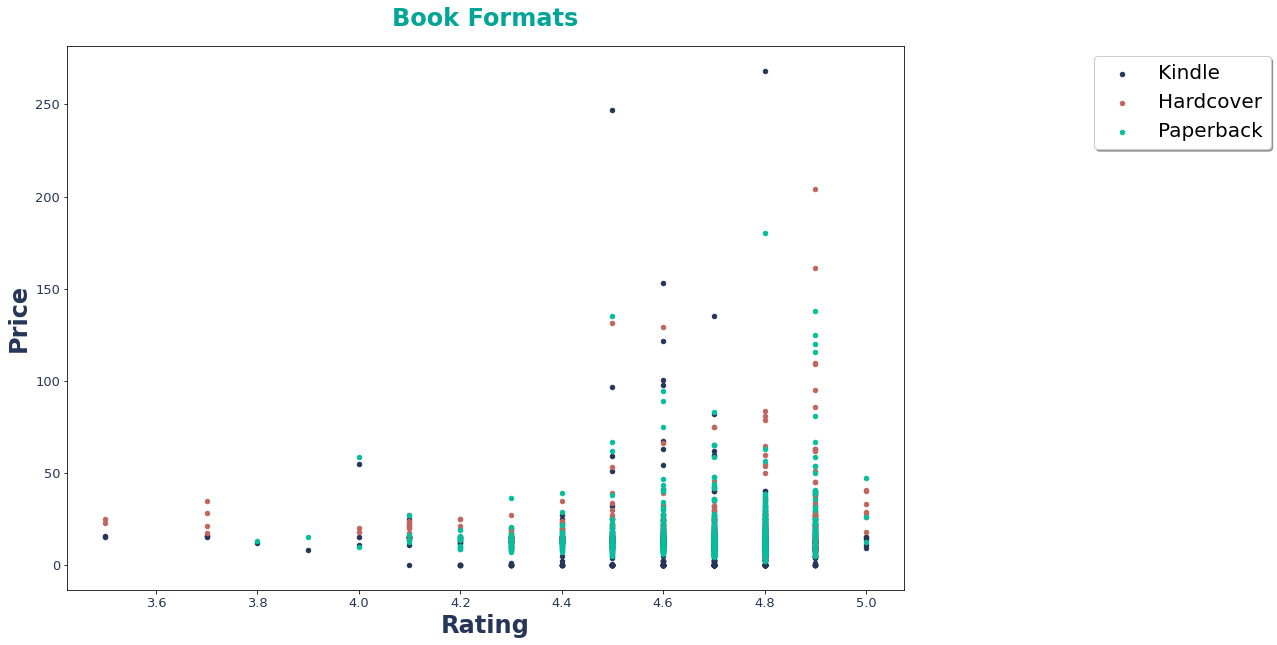

In [ ]:
plt.subplots(figsize=(15,10))
plt.style.use("seaborn-pastel")
plt.scatter(df_kindle["Rating"] , df_kindle["Kindle"] , label = "Kindle " ,s = 20, color = colors[0]);
plt.scatter(df_hardcover["Rating"] , df_hardcover["Hardcover"] , label = "Hardcover" ,s = 20, color = colors[4]);
plt.scatter(df_paperback["Rating"] , df_paperback["Paperback"] , label = "Paperback" ,s = 20, color = colors[2]);
plt.title("Book Formats" , fontsize = 24 , pad = 20 , fontweight='bold' , color = colors[1])
plt.xlabel("Rating" , fontsize = 24 , fontweight='bold' , color = colors[0]);
plt.ylabel("Price" , fontsize = 24 , fontweight='bold' , color = colors[0]);
plt.xticks(color = colors[0],fontsize = 13 )
plt.yticks(color = colors[0], fontsize = 13);
plt.legend(fontsize = 20 , bbox_to_anchor=(1.45, 1) , loc='upper right' , shadow=True);

Here we can see the most expensive books in each category

---
**Kindle**:  `Wills, Trusts, and Estates, Eleventh Edition`

In [ ]:
df_kindle[df_kindle['Kindle'] == df_kindle['Kindle'].max()]


,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback,Bayes_Weight
1214,"Wills, Trusts, and Estates, Eleventh Edition: ...",Robert H. Sitkoff and Jesse Dukeminier,4.8,39,64.66,NaN,268.2,NaN,4.8


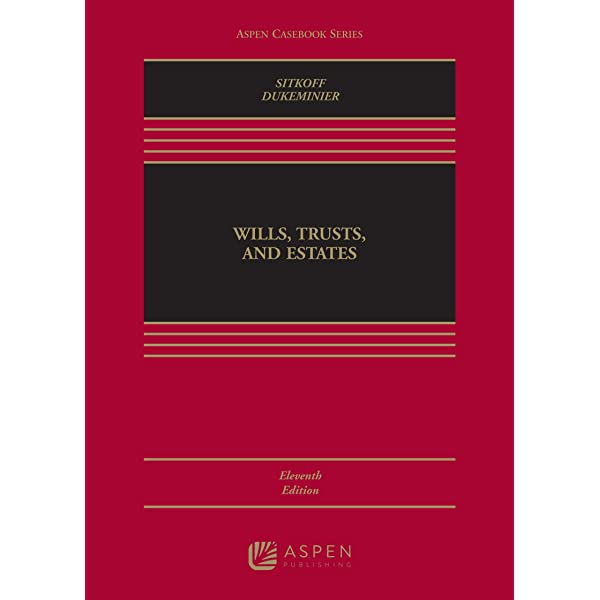

---
**Hardcover**: `Harry Potter book set`

*For the `Hardcover` category the most expensive book is not a single book, but a bookset of 7 books thats why it is so expensive*

In [ ]:
df_hardcover[df_hardcover['Hardcover'] == df_hardcover['Hardcover'].max()]

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback,Bayes_Weight
41,Harry Potter Paperback Box Set,J. K. Rowling and Mary GrandPré,4.9,96503,204.24,NaN,62.99,38.86,4.866


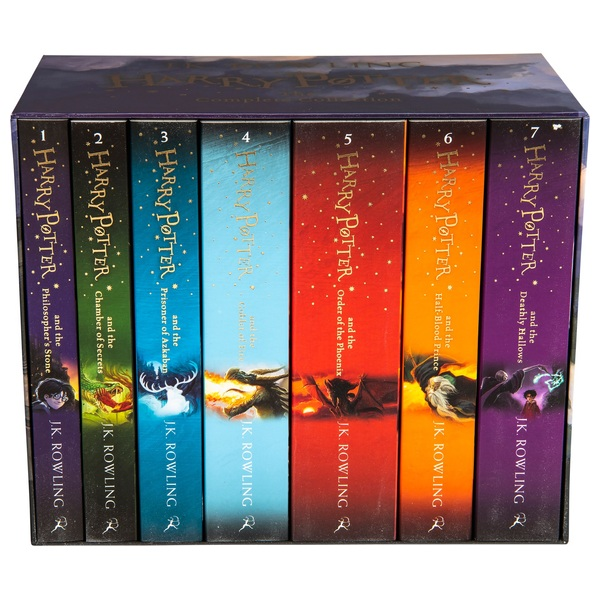

---
**Paperback:** `MCAT complete 7-book subject review 2021-2022`

For the Paperback category the most expensive book is not a single book, but a bookset of 6 books thats why it is so expensive

In [ ]:
df_paperback[df_paperback['Paperback'] == df_paperback['Paperback'].max()]

,Title,Author,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback,Bayes_Weight
311,"MCAT Complete 7-Book Subject Review 2023-2024,...",Kaplan Test Prep,4.8,2772,NaN,NaN,NaN,180.33,4.8


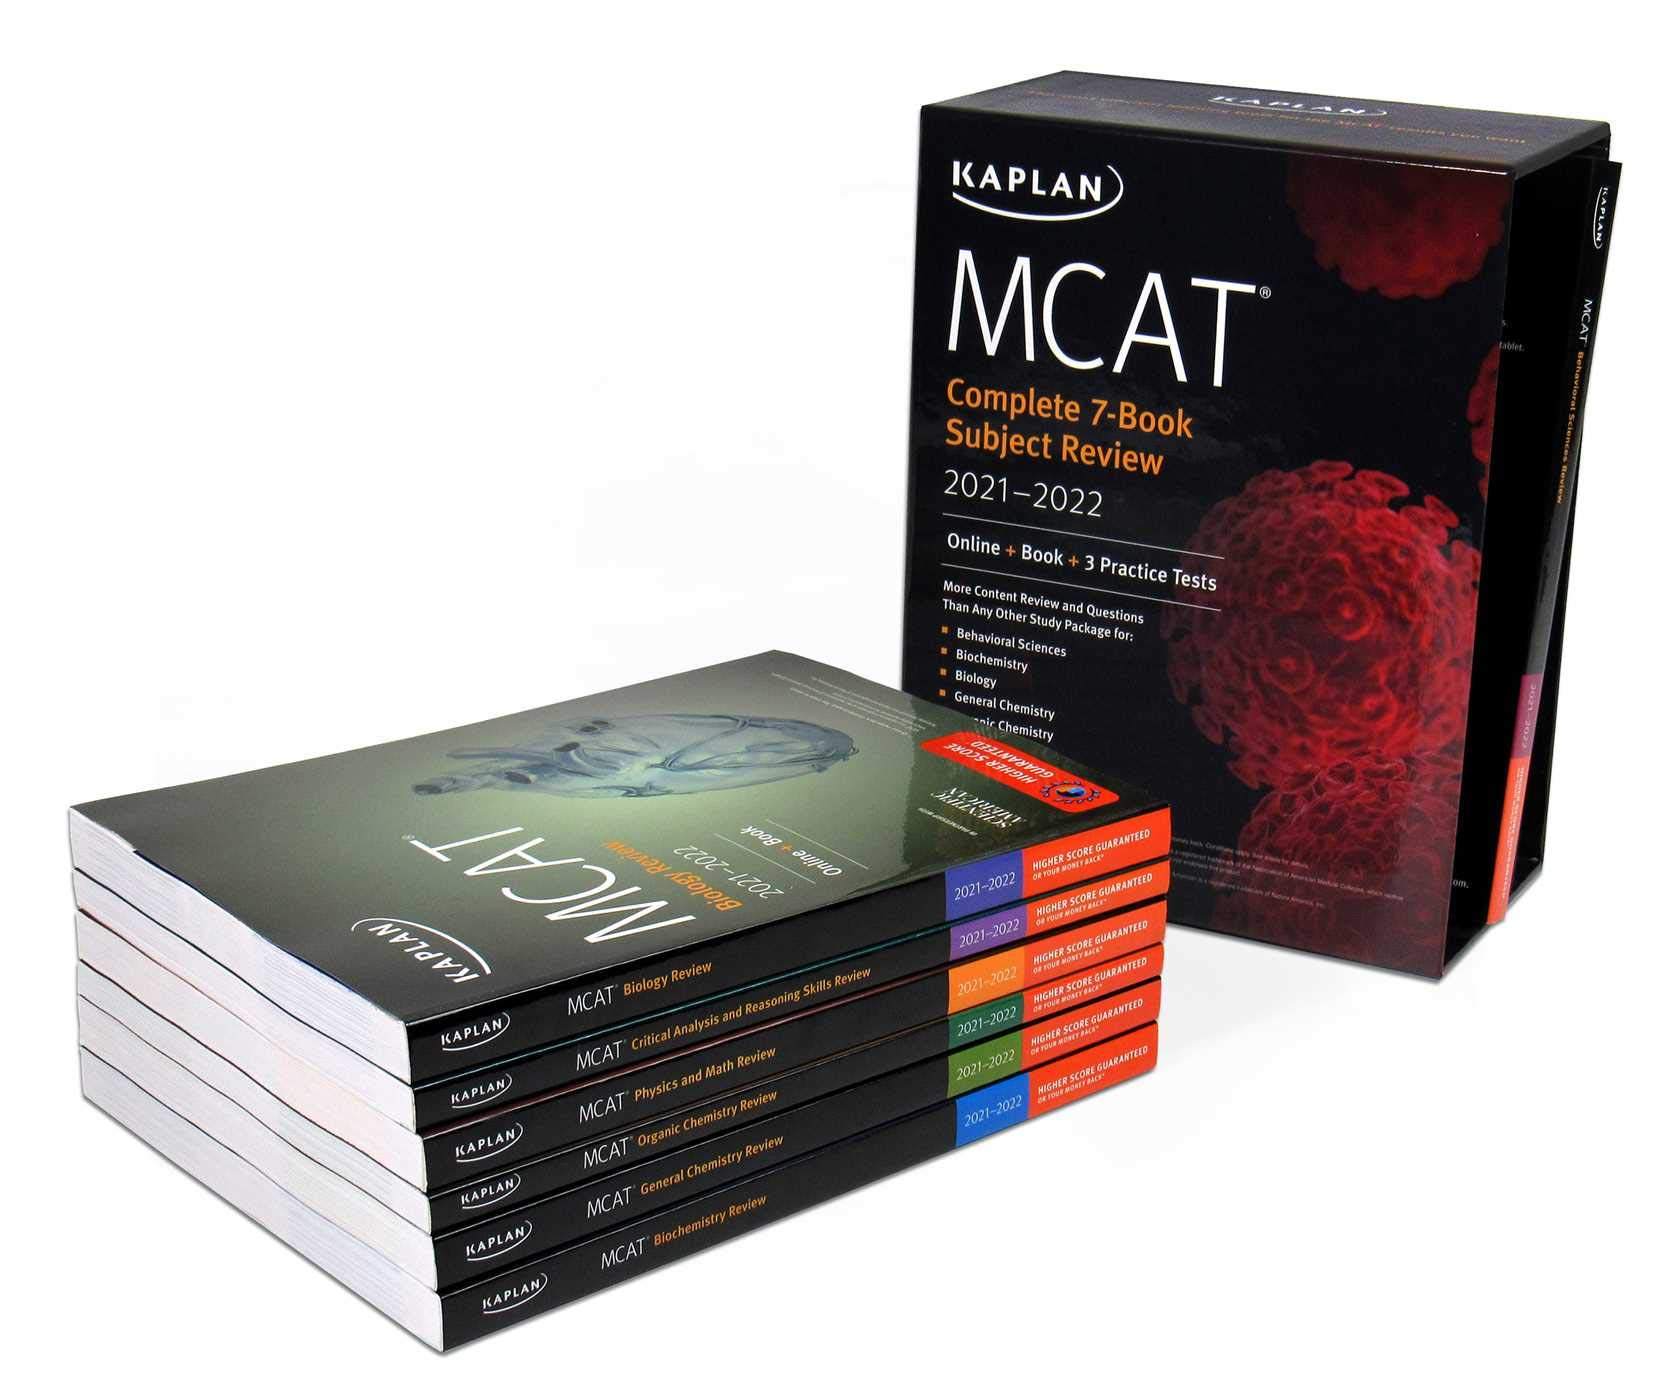

## 5.5 Bayesina Weight

Here we have visualized several graphis that shows the relation between Bayesian weight and Rating.  The graph shows the distribution of books across different levels of Bayes Weight and Rating. This can help us better understand the psichology of readers.

****
Here We have used mathplotlib's `erroebars` to see how the Rating and Bayesian weight change over the change of the **Rating**. At the graph we have the graph as a straight line and with the help of errors we see how the Bayes Weight changes which is rather interesting.

In [ ]:
# Sort the values with Rating
df_sort_rating = df.sort_values(by="Rating", ascending=True)

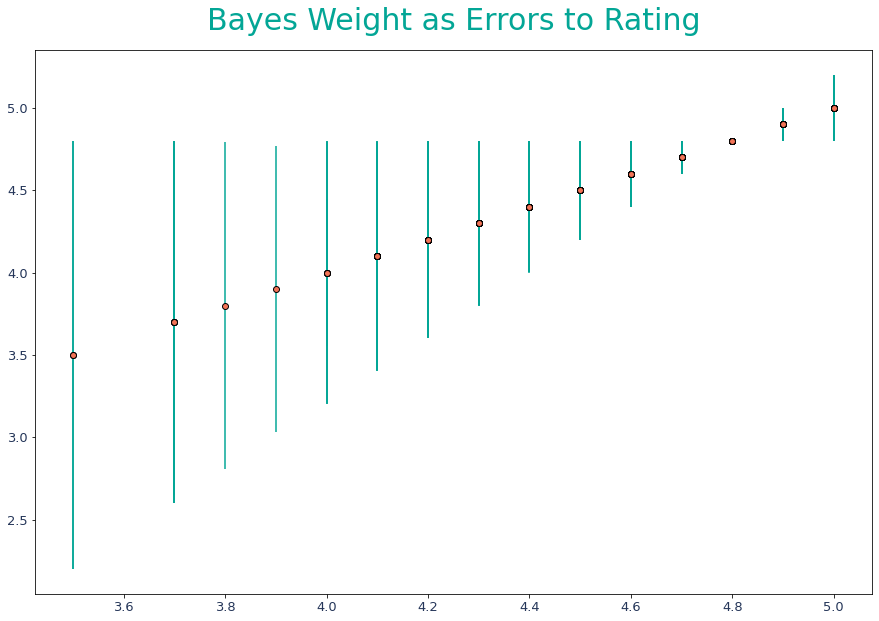

In [ ]:
plt.subplots(figsize=(15,10))
plt.title("Bayes Weight as Errors to Rating" ,  fontsize = 30 ,fontname='Arial' ,pad = 20 , fontweight='normal' , color = colors[1]);
plt.errorbar(df_sort_rating["Rating"], df_sort_rating["Rating"] , yerr=df_sort_rating["Bayes_Weight"] - df_sort_rating["Rating"] , fmt='.k' , ecolor=colors[1] , marker='o', markerfacecolor=colors[3]);
plt.xticks(color = colors[0], fontsize= 13)
plt.yticks(color = colors[0], fontsize= 13);


Another Visualisation that we have got here shows the relation between the Bayesian Weight and Vote Count. Using a `scatter` plot we have got an interesing pattern here. 

On the graph the Xaxis is the difference between Bayes weight and Rating ( *Thats why we get negative values*), and on the Yaxis we have the vote Count. 

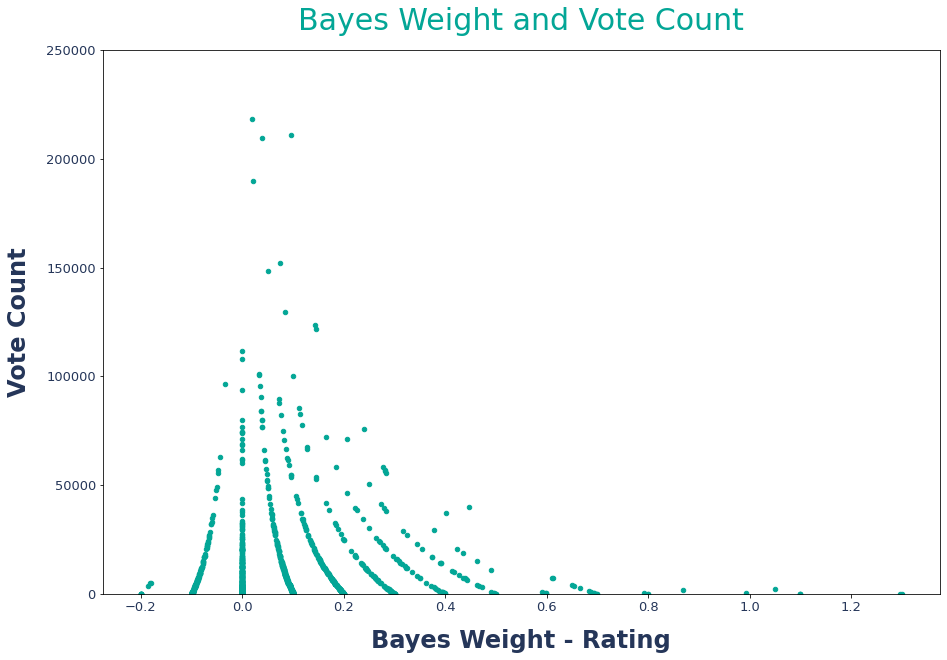

In [ ]:
plt.subplots(figsize=(15,10))
plt.scatter(df_sort_rating["Bayes_Weight"] - df_sort_rating["Rating"] , df_sort_rating["Rating_Count"] , s =20, color = colors[1])
plt.title("Bayes Weight and Vote Count" ,  fontsize = 30 ,fontname='Arial' ,pad = 20 , fontweight='normal' , color = colors[1]);
plt.xlabel("Bayes Weight - Rating" , fontsize = 24 , fontweight='bold' , labelpad=15, color=colors[0]);
plt.ylabel("Vote Count" , fontsize = 24 , fontweight='bold' , labelpad=15, color=colors[0]);
plt.xticks(color = colors[0],fontsize= 13)
plt.yticks(color = colors[0], fontsize= 13);
plt.ylim([0 , 250000]);


**Conclution:**

In both of our examples we can easyly see the difference between the bayes weight and Rating. We have concluded that the Ratings of the books with more Vote Count are more reliable and the difference between the Bayesian weigh and the Prior rating we have initialised before reaches 0 as the Vote Count increases.

We can alos note that the value the Bayesian weight can get is highly dependent to the choice of **Prior rating** and **Prior Vote Count**. For the books having bigger avarage rating than the **Prior rate** the  difference between Bayesian Weight and Rating increases as the Vote count increases.


##5.6 Authors' Rating and Bayesian Weight:

Now it's time to start Analising Authors. As we didn't have attributes for the Authors themselves, at this point it is crucial to calculate authors rating, Vote Count and Bayesian Weight based on the Ratings, Vote Counts and Bayes Weights for their books. 

***
Here you can see how we have calculated and made another DataFrame for Authors specifically.

In [ ]:
df_zero = df.fillna(0)
df_zero["middle_price"] = (df_zero["Hardcover"] + df_zero["Audiobook"] + df_zero["Kindle"] + df_zero["Paperback"]) // 3
df_zero["middle_sale"] = df_zero["Rating_Count"] * df_zero["middle_price"]
df_author = pd.pivot_table(df_zero , index = "Author" , aggfunc = {"Rating" : np.mean , "Rating_Count" : sum , "middle_price" : np.mean , "middle_sale" : sum })
bayes_series = ((df_author['Rating'] * df_author['Rating_Count']) + (prior_rating * prior_votes) ) / (df_author['Rating_Count'] + prior_votes)
df_author['Bayes_Weight'] = bayes_series.round(3)
df_author["Rating_Count"] = df_author["Rating_Count"].astype(int)
df_author_sorted = df_author.sort_values(by="Bayes_Weight", ascending=True)

Here we can see the sorted DataFarme of the Authors: weher the index is teh Authors name, and for the attributes we have Rating, `Vote Count`, `Avarage Price`, `Avarage Sales` and `Bayesian Weight`

In [ ]:
df_author_sorted

,Rating,Rating_Count,middle_price,middle_sale,Bayes_Weight
Author,,,,,
Matt Haig,4.300,211061,7.0,1477427.0,4.396
"Lucy Foley, Jot Davies, et al.",4.200,75622,8.0,604976.0,4.439
Richard Osman,4.300,123742,7.0,866194.0,4.444
Laura Dave,4.300,121829,9.0,1096461.0,4.445
Taylor Jenkins Reid,4.380,274635,8.0,2132767.0,4.445
...,...,...,...,...,...
Bill Martin Jr. and Eric Carle,4.900,49043,2.0,98086.0,4.850
Dr. Seuss,4.875,97450,6.5,628868.0,4.850
Robert Munsch and Sheila McGraw,4.900,55467,7.0,388269.0,4.853


For Visualisation that we have got here shows the relation between the Bayesian Weight and Vote Count for each Author. Using a `scatter` plot we have got an interesing pattern here. 

On the graph the Xaxis is the difference between Bayes weight and Rating , and on the Yaxis we have the vote Count. 

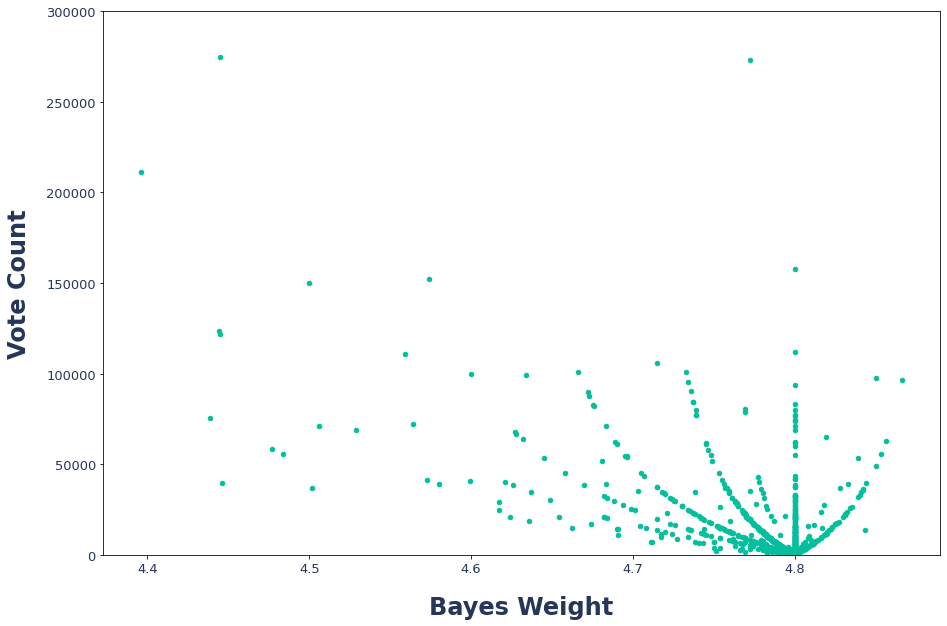

In [ ]:
plt.subplots(figsize=(15,10))
plt.scatter(df_author_sorted["Bayes_Weight"] , df_author_sorted["Rating_Count"] , color=colors[2], s=20);
plt.xlabel("Bayes Weight" , fontsize = 24 , fontweight='bold' , labelpad=20, color=colors[0]);
plt.ylabel("Vote Count" , fontsize = 24 , fontweight='bold' , labelpad=15, color=colors[0]);
plt.xticks(color = colors[0], fontsize= 13)
plt.yticks(color = colors[0], fontsize= 13);
plt.ylim([0 , 300000]);

Here we have another visualisation for the Authors. It shows the difference between Bayes Weight and Rating and the Vote Count for each Author 

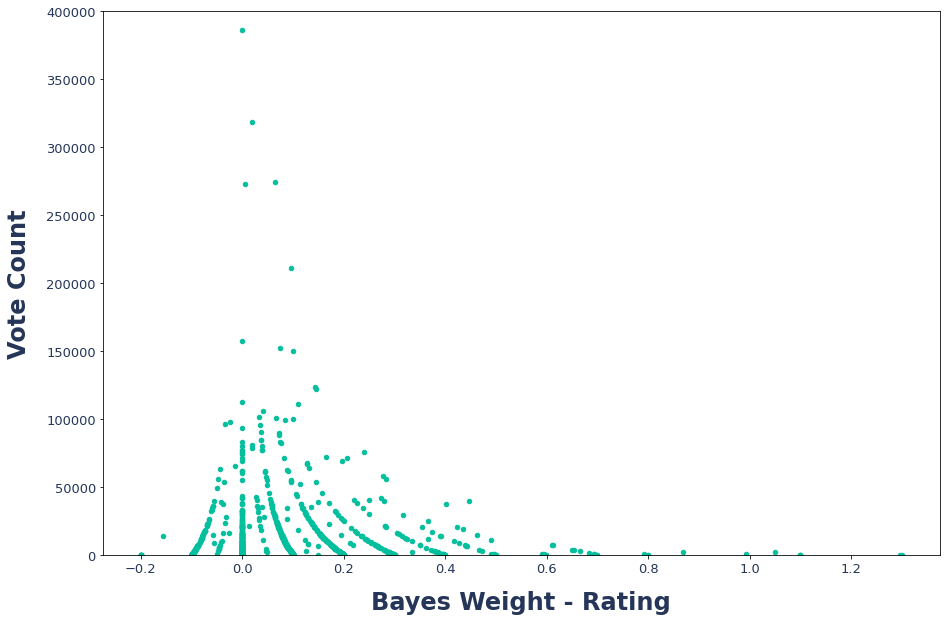

In [ ]:
plt.subplots(figsize=(15,10))
plt.scatter(df_author_sorted["Bayes_Weight"] - df_author_sorted["Rating"] , df_author_sorted["Rating_Count"] , s =20 , color=colors[2]);
plt.xlabel("Bayes Weight - Rating" , fontsize = 24 , fontweight='bold' , labelpad=15, color=colors[0]);
plt.ylabel("Vote Count" , fontsize = 24 , fontweight='bold' , labelpad=15, color=colors[0]);
plt.xticks(color = colors[0], fontsize= 13)
plt.yticks(color = colors[0], fontsize= 13);
plt.ylim([0, 400000]);

##5.7 Bestseller Author's sales

Based on the Books avarage value that we have calcualated here we demonstrate the authors' `Sales` , their `Rating` and `Popularity`.  

In [ ]:
df_author_sorted = df_author.sort_values(by="Rating_Count", ascending=True)
best_authors = df_author_sorted[-10:]
best_authors

,Rating,Rating_Count,middle_price,middle_sale,Bayes_Weight
Author,,,,,
Richard Osman,4.300000,123742,7.000000,866194.0,4.444
Emily Henry,4.400000,149789,6.000000,898734.0,4.500
Alex Michaelides,4.500000,152175,7.000000,1065225.0,4.574
Dungeons & Dragons,4.800000,157468,11.500000,1614421.0,4.800
Matt Haig,4.300000,211061,7.000000,1477427.0,4.396
Sarah J. Maas,4.766667,273026,22.333333,2314667.0,4.772
Taylor Jenkins Reid,4.380000,274635,8.000000,2132767.0,4.445
Kristin Hannah,4.650000,318275,6.750000,2298408.0,4.670
Delia Owens,4.800000,385974,7.000000,2701818.0,4.800


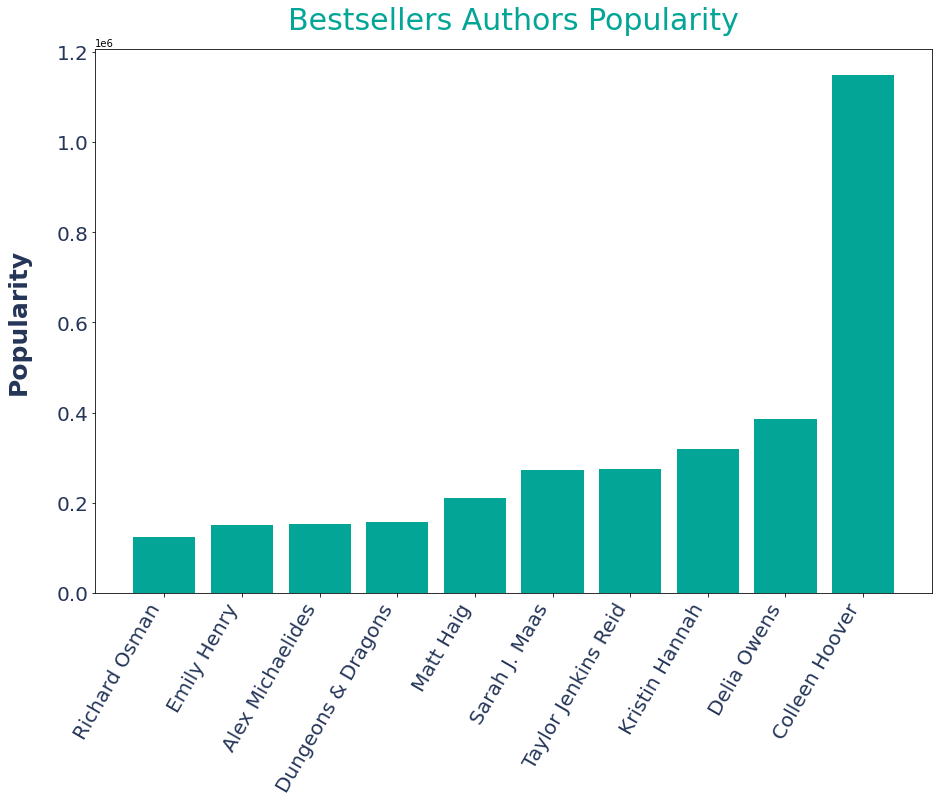

In [ ]:
plt.subplots(figsize=(15,10))
plt.bar(best_authors.index , best_authors['Rating_Count'], color=colors[1])
plt.xticks(rotation = 60 , fontsize = 20, ha='right' , color = colors[0])
plt.yticks(fontsize = 20 , color = colors[0]);
plt.title("Bestsellers Authors Popularity" ,  fontsize = 30 ,fontname='Arial' ,pad = 20 , fontweight='normal' , color = colors[1]);
plt.ylabel("Popularity" , fontsize = 25 , fontweight='bold' , labelpad=25, color=colors[0]);

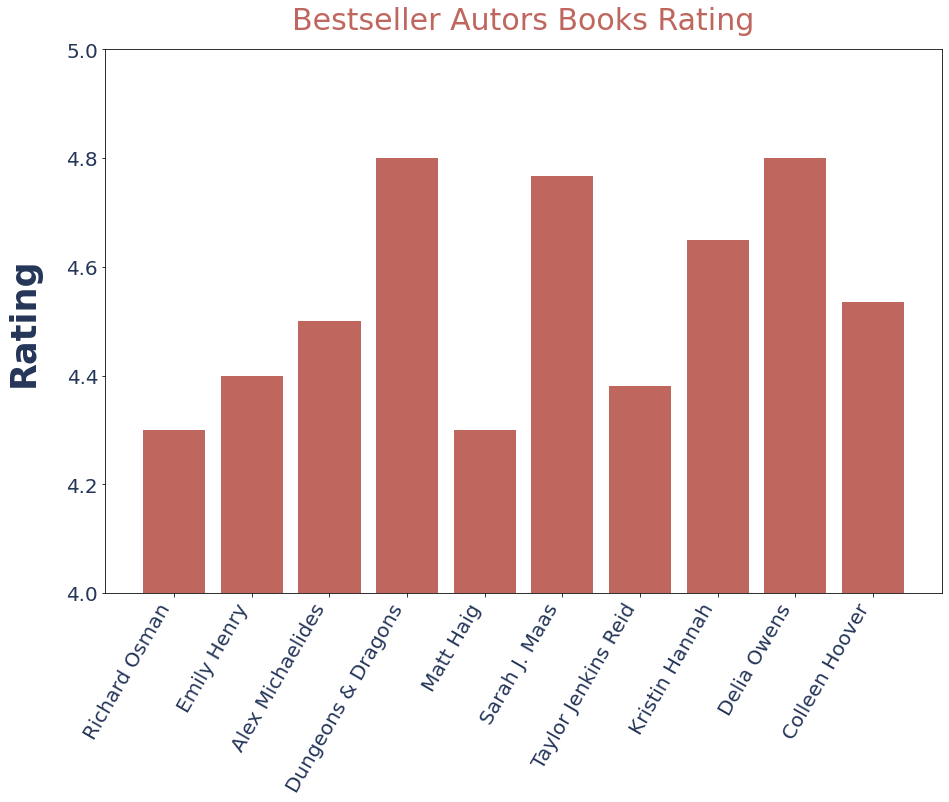

In [ ]:
plt.subplots(figsize=(15,10))
plt.bar(best_authors.index , best_authors['Rating'], color = colors[4])
plt.ylim(4, 5)
plt.xticks(rotation = 60 , fontsize = 20, ha='right' , color = colors[0])
plt.title("Bestseller Autors Books Rating" ,  fontsize = 30 ,fontname='Arial' ,pad = 20 , fontweight='normal' , color = colors[4]);
plt.yticks(fontsize = 20 , color = colors[0]);
plt.ylabel("Rating" , fontsize = 35 , fontweight='bold' , labelpad=25, color = colors[0]);

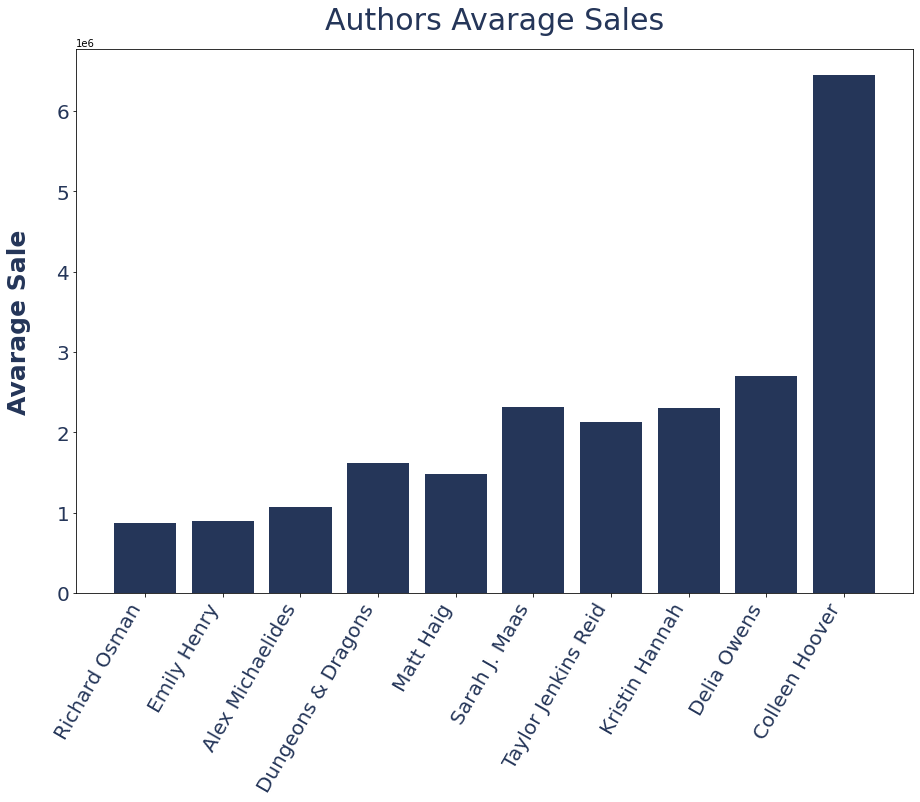

In [ ]:
plt.subplots(figsize=(15,10))
plt.bar(best_authors.index , best_authors['middle_sale'] , color = colors[0])
plt.xticks(rotation = 60 , fontsize = 20, ha='right' , color = colors[0])
plt.yticks(fontsize = 20 , color = colors[0]);
plt.ylabel("Avarage Sale" , fontsize = 25 , fontweight='bold' , labelpad=25 , color = colors[0]);
plt.title("Authors Avarage Sales" ,  fontsize = 30 ,fontname='Arial' ,pad = 20 , fontweight='normal' , color = colors[0]);

## 5.8 Correlations


This is the final step of our visualisation process. Here we have correlated the datasets we had and visualised them for better view.

***
For the first dataframe we have chosen the main dataset that we had collected. As we can remember the dataset has 7 attributes: `Rating`, 	`Rating_Count `,	`Hardcover`, ` 	Audiobook`,` 	Kindle`, ` 	Paperback`,` 	Bayes_Weight`. For these values ve have used pandase's `.corr()` method and git the **Correlation Matrix**


In [ ]:
df.corr()

,Rating,Rating_Count,Hardcover,Audiobook,Kindle,Paperback,Bayes_Weight
Rating,1.000000,-0.070692,0.058884,0.034134,-0.016340,0.133042,0.549155
Rating_Count,-0.070692,1.000000,-0.039508,-0.003865,-0.095141,-0.180535,-0.495458
Hardcover,0.058884,-0.039508,1.000000,-0.150782,0.386103,0.419344,0.139880
Audiobook,0.034134,-0.003865,-0.150782,1.000000,NaN,NaN,0.029949
Kindle,-0.016340,-0.095141,0.386103,NaN,1.000000,0.573079,0.103831
Paperback,0.133042,-0.180535,0.419344,NaN,0.573079,1.000000,0.198774
Bayes_Weight,0.549155,-0.495458,0.139880,0.029949,0.103831,0.198774,1.000000


Withe the help of Seaborn command `heatmap` we have visualised the matrix

In [ ]:
import seaborn as sns

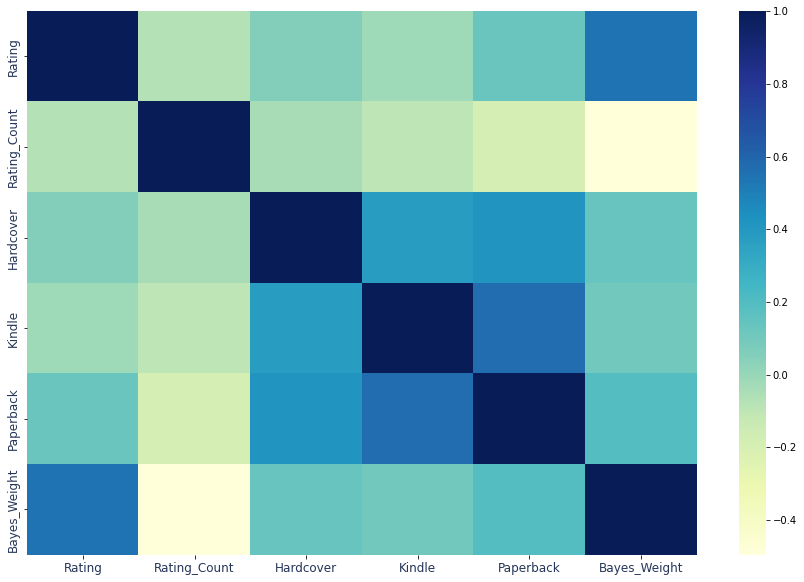

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.drop('Audiobook',axis = 1).corr(), cmap='YlGnBu');
plt.xticks( fontsize = 12, color = colors[0])
plt.yticks(fontsize = 12 , color = colors[0]);

We did the same think for the authors dataset 








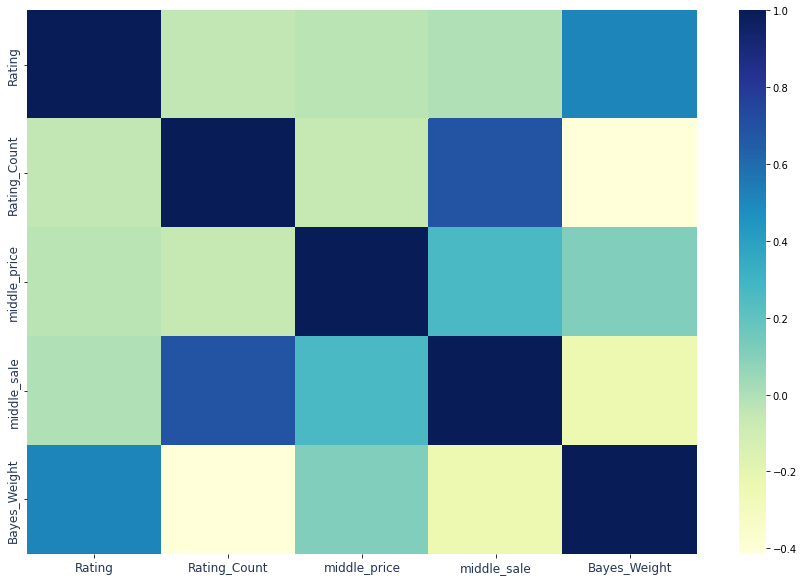

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_author.corr(), cmap='YlGnBu');
plt.xticks( fontsize = 12, color = colors[0])
plt.yticks(fontsize = 12 , color = colors[0]);

# 6 Conclution

In this project, we have analyzed Amazon's books dataset using data science techniques to gain insights into the factors that contribute to the popularity and success of books on the platform. Through our analysis, we have identified several important factors that are associated with a book's success on Amazon.

One key finding of our analysis is the importance of reader opinions in determining a book's success. We have seen that books with a higher number of ratings and a higher average rating tend to have higher Bayes Weight and Rating, which indicates that reader opinions are a significant factor in a book's success on Amazon.

We have also identified several other factors that are associated with a book's success on Amazon. For example, we have found that certain genres and authors tend to have higher Bayes Weight and Rating, while other variables such as price. Overall the most impactfull variable is the author's rating and popularity.

Through our analysis, we have created several visualizations that help to illustrate the relationship between different factors.  These visualizations have provided valuable insights into the factors that contribute to a book's popularity on the platform.

Overall, our analysis has provided a comprehensive understanding of the factors that contribute to the success of books on Amazon. This information can be useful for authors, publishers, and marketers who are looking to improve the popularity and sales of their books on the platform. Furthermore, our analysis can serve as a starting point for further research into the factors that influence the success of books in the online marketplace.